In [2]:
import os 
import matplotlib.pyplot as plt
import torch
import torchvision

from PIL import Image
from torch.utils.data import Dataset, DataLoader
from datasets.datasets import *
from src.experimenter import Experimenter

### 1. Datasets Load

In [3]:
dataset_path = os.path.join(os.getcwd(), 'datasets')

In [4]:
cifar10_train = CIFAR10(
    root = os.path.join(dataset_path, 'cifar10'), 
    image_size = 32,
    train = True,
)

cifar10_eval = CIFAR10(
    root = os.path.join(dataset_path, 'cifar10'),
    image_size = 32,
    train = False,
)

In [5]:
celebA = CelebA(
    root = os.path.join(dataset_path, 'celeba'),
    image_size = 256
)

In [6]:
lsun_church_train = CustomLSUN(
    root = os.path.join(dataset_path, 'lsun'),
    classes = ['church_outdoor_train'],
    image_size = 256
)

lsun_church_eval = CustomLSUN(
    root = os.path.join(dataset_path, 'lsun'),
    classes = ['church_outdoor_val'],
    image_size = 256
)

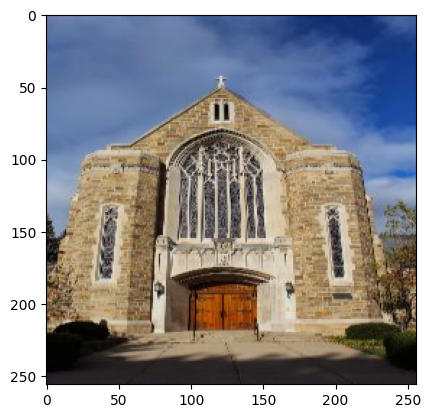

In [7]:
plt.imshow(lsun_church_train[5].numpy().transpose(1, 2, 0))

### 2. Model Train on CIFAR10

In [18]:
cifar10_experimenter = Experimenter(
    dataset_name='cifar10',
    train_dataset=cifar10_train,
    eval_dataset=cifar10_eval,
    image_channels=3,
    image_size=32,
    n_channels=128,
    channel_multiplers=[1, 2, 1, 1],
    is_attention=[False, True, False, False],
    learning_rate=0.0002
)

In [ ]:
cifar10_experimenter.train(n_epochs=1000)

Epoch 1/1000:   2%|▏         | 6/391 [01:51<2:03:13, 19.20s/it, loss=0.105] 

## 3. Model Train on CelebA

In [ ]:
celebA_experimenter = Experimenter(
    dataset_name='celebA',
    train_dataset=celebA,
    image_channels=3,
    image_size=256,
    n_channels= 128,
    channel_multiplers=[1, 1, 2, 1, 2, 1],
    is_attention=[False, False, False, False, True, False],
    batch_size=64,
    learning_rate=0.00002
)